# 1. Apply the gradient calculator for linear regression

Its time to throw away the 'hand-written' gradient for linear regression you were given before - in favor of the more flexible autograd gradient calculator.  This calculator will allow us to easily generalize our linear regression code to perform nonlinear regression - but one step at a time!  First apply it to your linear regression code to automatically generate the gradient of the Least Squares cost function (for use with gradient descent).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad as compute_grad   # The only autograd function you may ever need

class learner():
    def __init__(self,**args):
        self.x=0
        self.y=0
        self.whist = []
        self.ghist = []
        self.w_best = 0
        
        # reset defaults if requested
        self.K = 100
        if 'max_its' in args:
            self.K = args['max_its']
            
        self.alpha = 10**-3
        if 'alpha' in args:
            self.alpha = args['alpha']

    # load data
    def load_data(self,csvname):
        data = np.asarray(pd.read_csv(csvname))
        self.data = data
        self.x = data[:,:-1]
        self.y = data[:,-1]
        self.y.shape = (len(self.y),1)
     
    # compute cost value
    def compute_cost_val(self,w):
        P = len(self.y)
        cost = 0

        # run over all data points and weights and compute total error
        for p in range(P):
            # get pth point
            x_p = self.x[p]
            y_p = self.y[p]           
            
            # linear combo
            temp = w[0] + sum([v*e for v,e in zip(x_p,w[1:])])
                        
            # add error to cost
            cost += (temp - y_p)**2
        return cost

    # gradient descent loop
    def grad_descent(self):
        # initial point
        w = np.random.randn(np.shape(self.x)[1]+1,1)

        # compute gradient of cost function for use in loop
        grad = compute_grad(self.compute_cost_val)

        # create container to record weights
        self.whist = []
        self.ghist = []

        # descent loop
        self.w_best = w
        g_best = np.inf
        for k in range(self.K):
            # record current weight and cost
            self.whist.append(w)
            g = self.compute_cost_val(w)
            self.ghist.append(g)
            if g < g_best:
                self.w_best = w
                g_best = g

            # take descent step
            w = w - self.alpha*grad(w)
    
    # a short function to perform predictions
    def predict(self,x_input):
        ind = np.argmin()
        output = self.w_best[0] + np.dot(self.w_best[1:],x_input)
        return output[0]

# 2d example

Apply the gradient calculator to automate your gradient descent for linear regression code and test it on the 2-d dataset shown below.

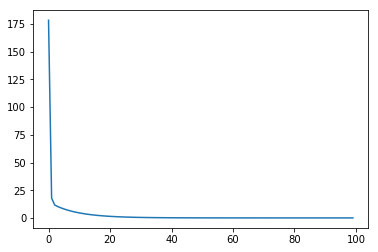

In [2]:
# get instance of linear regression class
test = learner(max_its=100,alpha = 10**-2)

# data input
csvname = '../datasets/2d_linregress_data.csv'
test.load_data(csvname)

# run grad descent
test.grad_descent()

# print history
plt.plot(test.ghist)
plt.show()

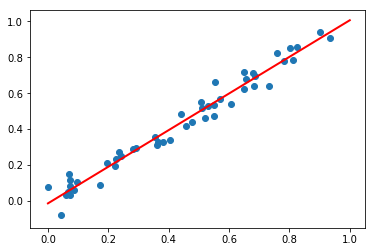

In [3]:
# now lets plot the points and line
plt.scatter(test.x,test.y)
s = np.linspace(0,1)
w = test.w_best
t = []
for i in range(len(s)):
    temp = w[0] + w[1]*s[i]
    t.append(temp)
plt.plot(s,t,c = 'r',linewidth = 2)
plt.show()

# 3d example

To make sure your code generalizes test it on the 3-d dataset below as well.

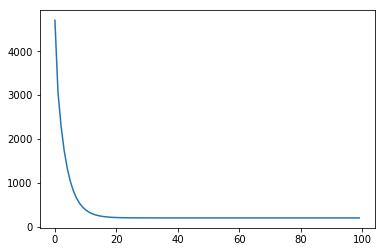

In [4]:
# get instance of linear regression class
test = learner(max_its=100,alpha = 10**-2)

# data input
csvname = '../datasets/3d_linregress_data.csv'
test.load_data(csvname)

# run grad descent
test.grad_descent()

# print history
plt.plot(test.ghist)
plt.show()

In [5]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# define figure
fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection='3d')
ax.scatter(test.x[:,0],test.x[:,1],test.y)

# create plotting range
r = np.linspace(-2,2,100)

# create grid from plotting range
xx,yy= np.meshgrid(r,r)
xx.shape = (len(r)**2,1)
yy.shape = (len(r)**2,1)

# produce plane
w = test.whist[-1]
t = w[0] + w[1]*xx + w[2]*yy

# plot cost surface
xx.shape = (len(r),len(r))
yy.shape = (len(r),len(r))
t.shape = (len(r),len(r))
ax.plot_surface(xx,yy,t,alpha = 0.1)
plt.show()

<IPython.core.display.Javascript object>